In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os, json, math, librosa
import IPython.display as ipd
import librosa.display
from IPython.display import Audio
from matplotlib import cm
import pylab
from PIL import Image
from matplotlib.pyplot import imshow

%matplotlib inline

In [36]:
MUSIC = 'Data/genres_original/'
music_dataset = []  
genre_target = []  
for root, dirs, files in os.walk(MUSIC):
    for name in files:
        filename = os.path.join(root, name)
        if filename != '/Data/genres_original/jazz/jazz.00054.wav':
            music_dataset.append(filename)
            genre_target.append(filename.split("/")[2])
            

In [37]:
music_dataset.pop(0)
genre_target.pop(0)
music_dataset.remove('Data/genres_original/jazz/jazz.00054.wav')

music_dataset

['Data/genres_original/pop/pop.00027.wav',
 'Data/genres_original/pop/pop.00033.wav',
 'Data/genres_original/pop/pop.00032.wav',
 'Data/genres_original/pop/pop.00026.wav',
 'Data/genres_original/pop/pop.00030.wav',
 'Data/genres_original/pop/pop.00024.wav',
 'Data/genres_original/pop/pop.00018.wav',
 'Data/genres_original/pop/pop.00019.wav',
 'Data/genres_original/pop/pop.00025.wav',
 'Data/genres_original/pop/pop.00031.wav',
 'Data/genres_original/pop/pop.00009.wav',
 'Data/genres_original/pop/pop.00035.wav',
 'Data/genres_original/pop/pop.00021.wav',
 'Data/genres_original/pop/pop.00020.wav',
 'Data/genres_original/pop/pop.00034.wav',
 'Data/genres_original/pop/pop.00008.wav',
 'Data/genres_original/pop/pop.00022.wav',
 'Data/genres_original/pop/pop.00036.wav',
 'Data/genres_original/pop/pop.00037.wav',
 'Data/genres_original/pop/pop.00023.wav',
 'Data/genres_original/pop/pop.00044.wav',
 'Data/genres_original/pop/pop.00050.wav',
 'Data/genres_original/pop/pop.00078.wav',
 'Data/genr

In [38]:
print(set(genre_target))

{'metal', 'reggae', 'pop', 'classical', 'jazz', 'hiphop', 'disco', 'country', 'rock', 'blues'}


In [39]:
audio_path = music_dataset[50]
y, sr = librosa.load(audio_path, sr = 22050) # Use the default sampling rate of 22,050 Hz

In [40]:
from IPython.display import Audio

Audio(y, rate=sr)

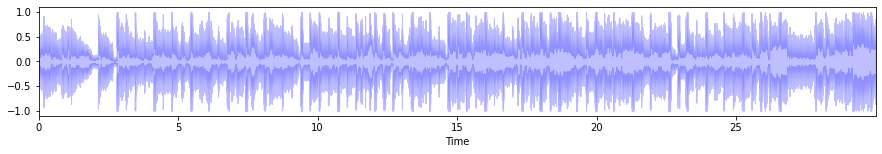

In [41]:
plt.figure(figsize=(15,2))
librosa.display.waveplot(y  = y,
                     sr     = sr, 
                     max_sr = 1000, 
                     alpha  = 0.25, 
                     color  = 'blue')

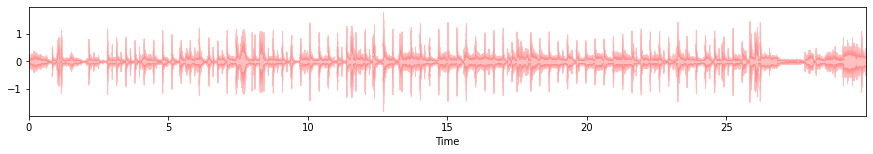

In [42]:
pre_emphasis = 0.97
y = np.append(y[0], y[1:] - pre_emphasis * y[:-1])
plt.figure(figsize=(15,2))
librosa.display.waveplot(y  = y,
                     sr     = sr, 
                     max_sr = 1000, 
                     alpha  = 0.25, 
                     color  = 'red')

FT Shape (1025, 1293)


Text(0.5, 1.0, 'Linear Amplitude')

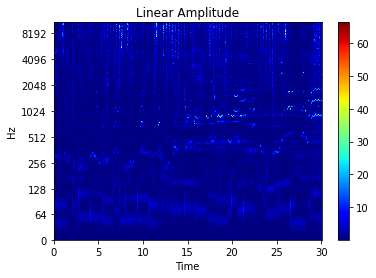

In [43]:
D = librosa.stft(y, n_fft = 2048, hop_length = 512)
print('FT Shape', D.shape)

# Y-axis can be linear or log or mel
librosa.display.specshow(np.abs(D), x_axis='time', y_axis='log', cmap=cm.jet,) # Take magnitude of complex number
plt.colorbar()
plt.title('Linear Amplitude')

Text(0.5, 1.0, 'Log Amplitude')

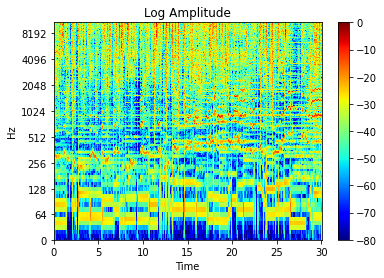

In [44]:
log_amplitude = librosa.amplitude_to_db(D, ref=np.max)
librosa.display.specshow(log_amplitude, x_axis='time', y_axis='log', cmap=cm.jet,)
plt.colorbar()
plt.title('Log Amplitude')

Text(0.5, 1.0, 'Log Power')

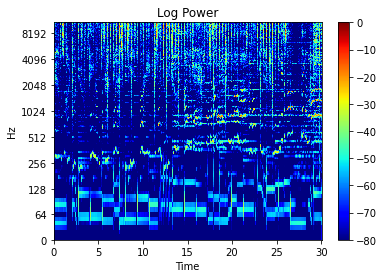

In [45]:
log_amplitude = librosa.amplitude_to_db(D**2, ref=np.max) # Square amplitude and then take log
librosa.display.specshow(log_amplitude, x_axis='time', y_axis='log', cmap=cm.jet,)
plt.colorbar()
plt.title('Log Power')


Transform shape (84, 1293)


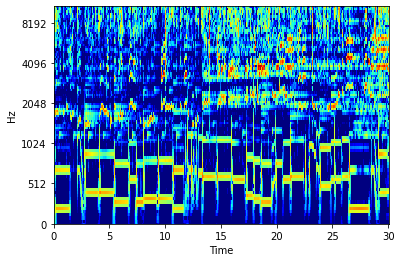

In [46]:
C = librosa.cqt(y, sr=sr, n_bins=84)
print('Transform shape', C.shape) 
log_power = librosa.amplitude_to_db(C**2, ref=np.max)
librosa.display.specshow(log_power, x_axis='time', y_axis='mel', cmap=cm.jet)

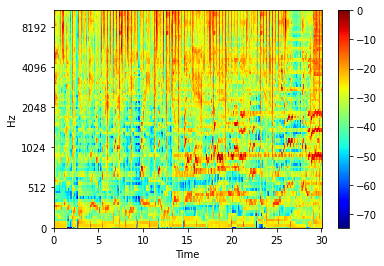

In [47]:
M = librosa.feature.melspectrogram(y, sr, fmax = sr/2, n_fft=2048, hop_length=512, 
                                   n_mels = 96, power = 2) # Power = 2 refers to squared amplitude 
                                                           # Hanning window by default
log_power = librosa.power_to_db(M, ref=np.max)# Covert to dB (log) scale
librosa.display.specshow(log_power, x_axis='time', y_axis='mel', cmap=cm.jet)
plt.colorbar()

In [48]:
WAV_DIR = 'Data/genres_original/'
IMG_DIR = 'Images/'

In [49]:
def find_nth(string, substring, n):
    if (n == 1):
        return string.find(substring)
    else:
        return string.find(substring, find_nth(string, substring, n - 1) + 1)

In [17]:
for name in music_dataset:
    y, sr = librosa.load(name, sr = 22050) 
    M = librosa.feature.melspectrogram(y, sr, 
                                           fmax = sr/2, # Maximum frequency to be used on the on the MEL scale
                                           n_fft=2048, 
                                           hop_length=512, 
                                           n_mels = 96, # Set as per the Google Large-scale audio CNN paper
                                           power = 2) # Power = 2 refers to squared amplitude
    # Power in DB
    log_power = librosa.power_to_db(M, ref=np.max)# Covert to dB (log) scale

    # Plotting the spectrogram
    pylab.figure(figsize=(5,5))
    pylab.axis('off') 
    pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[]) # Remove the white edge

    librosa.display.specshow(log_power, cmap=cm.jet)
    n = find_nth(name, '/', 3)
    pylab.savefig(IMG_DIR + name[n:-4]+'.jpg', bbox_inches=None, pad_inches=0)
    pylab.close()